<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           6080 non-null   int64  
 1   city            6080 non-null   object 
 2   area            6080 non-null   int64  
 3   rooms           6080 non-null   int64  
 4   bathroom        6080 non-null   int64  
 5   parking_spaces  6080 non-null   int64  
 6   floor           6080 non-null   object 
 7   animal          6080 non-null   object 
 8   furniture       6080 non-null   object 
 9   hoa             6080 non-null   object 
 10  rent_amount     6080 non-null   float64
 11  property_tax    6080 non-null   float64
 12  fire_insurance  6080 non-null   float64
 13  total           6080 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 665.1+ KB


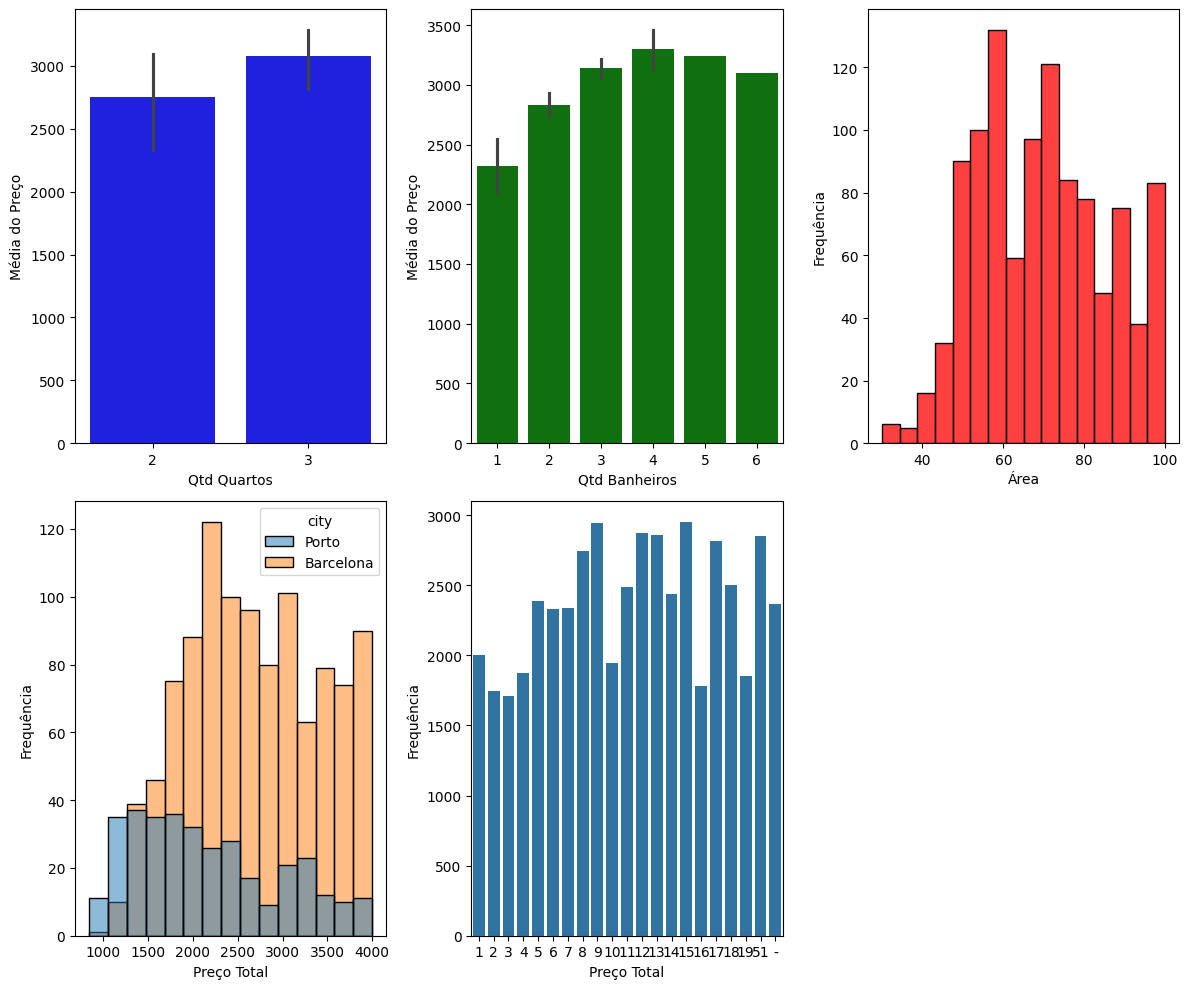

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1843,1843,Porto,100,2,1,0,16,accept,not furnished,550,900.0,61.0,12.0,1523.0
5175,5175,Porto,72,2,1,2,16,accept,not furnished,730,1200.0,89.0,16.0,2035.0


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Caminho relativo para o arquivo Excel
caminho_arquivo = os.path.join('..', 'Materiais', 'houses_rent.xlsx')

# Carregar o arquivo Excel - Biblioteca pandas
aluguel_casa = pd.read_excel(caminho_arquivo)

# Exibir as primeiras 5 linhas do DataFrame
print('Head Inicial:')
print(aluguel_casa.head())
print()

# Modificar as colunas com espaços
aluguel_casa = aluguel_casa.rename(columns = {'parking spaces': 'parking_spaces', 'rent amount': 'rent_amount', 'property tax': 'property_tax', 'fire insurance': 'fire_insurance'})

# Exibir Head atualizado
print('Head Atualizado:')
print(aluguel_casa.head())
print()

# Tipos de dados
print('Tipos Originais')
print(aluguel_casa.dtypes)
print()

# Modificar tipos de dados
aluguel_casa = aluguel_casa.astype({'rent_amount': 'float', 'property_tax': 'float', 'fire_insurance': 'float', 'total': 'float'})
print('Tipos Modificados')
print(aluguel_casa.dtypes)
print(aluguel_casa.head())
print()

# Função info para obter um resumo sobre o DataFrame
print(aluguel_casa.info())
print()

# Selecionar colunas e descrever estatísticas
print(aluguel_casa[['area', 'rooms', 'bathroom', 'parking_spaces', 'rent_amount', 'property_tax', 'fire_insurance', 'total']].describe())
print()

# Filtrar valores com múltiplas condições
aluguel_casa = aluguel_casa[(aluguel_casa['total'] <= 4000) & (aluguel_casa['animal'] == 'accept') & ((aluguel_casa['rooms'] == 2) | (aluguel_casa['rooms'] == 3))]
print(aluguel_casa.head())
print()
print(aluguel_casa.describe())
print()

# Filtrar usando query
aluguel_casa = aluguel_casa.query("(total <= 4000 and animal == 'accept') and (rooms == 2 or rooms == 3)")
print(aluguel_casa.head())
print()
print(aluguel_casa.describe())
print()

# Agrupando dados por cidade e calculando a média do preço
agg_city_price = aluguel_casa.groupby(['city'])['total'].agg('mean').reset_index()
print(agg_city_price)
print()

# Agrupando dados por banheiro e quartos e calculando a média do preço
agg_bath_room_price = aluguel_casa.groupby(['bathroom', 'rooms'])['total'].agg('mean').reset_index()
print(agg_bath_room_price)
print()

# Criando a figura com múltiplos subgráficos
n_graficos = 5  # Número total de gráficos
n_cols = 3  # Número de colunas
n_rows = -(-n_graficos // n_cols)  # Arredonda para cima (cálculo de divisão inteira)

# Definindo a figura e os subgráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))
axes = axes.flatten()  # Transforma a matriz em um array 1D para facilitar a indexação

# Gráfico 1 - Barplot de quartos
sns.barplot(data = agg_bath_room_price, x = 'rooms', y = 'total', color = 'blue', ax=axes[0])
axes[0].set(xlabel = 'Qtd Quartos', ylabel = 'Média do Preço')

# Gráfico 2 - Barplot de banheiros
sns.barplot(data = agg_bath_room_price, x = 'bathroom', y = 'total', color = 'green', ax=axes[1])
axes[1].set(xlabel = 'Qtd Banheiros', ylabel = 'Média do Preço')

# Gráfico 3 - Histograma da área
agg_area = aluguel_casa[['area']]
agg_area = agg_area.query('area <= 100')  # Filtrando as áreas menores ou iguais a 100
sns.histplot(data = agg_area, x = 'area', color = 'red', ax=axes[2])
axes[2].set(xlabel = 'Área', ylabel = 'Frequência')

# Gráfico 4 - Histograma dos preços sobre a cidade
sns.histplot(data = aluguel_casa, x = 'total', hue = 'city', ax=axes[3])
axes[3].set(xlabel = 'Preço Total', ylabel = 'Frequência')

# Gráfico 5 - Barplot do preço médio por andar (para cidade Porto) 
aluguel_casa = aluguel_casa.query("city == 'Porto'")
print(aluguel_casa.describe())
print()
print(aluguel_casa.groupby('floor').index.nunique().sort_values(ascending = False))
print()
agg_floor_price = aluguel_casa.groupby('floor')['total'].agg('mean').reset_index()
print(agg_floor_price)
sns.barplot(data = agg_floor_price, x = 'floor', y = 'total', ax=axes[4])
axes[4].set(xlabel = 'Preço Total', ylabel = 'Frequência')

# Removendo gráficos vazios, se houver
for i in range(n_graficos, len(axes)):  
    fig.delaxes(axes[i])  # Remove eixos não utilizados

# Ajustando o layout para que os gráficos não se sobreponham
plt.tight_layout()

# Exibindo os gráficos
plt.show()

# Mostrar apartamento do 16º andar, porque era mais barato em relação aos outros andares (custo-benefício)
sixteenth_floor = aluguel_casa.query('floor == 16')
print(sixteenth_floor.head())
